SpectralCube with shape=(350, 263, 326):
 n_x:    326  type_x: GLON-TAN  unit_x: deg    range:     0.297084 deg:    0.459582 deg
 n_y:    263  type_y: GLAT-TAN  unit_y: deg    range:    -0.021389 deg:    0.109611 deg
 n_s:    350  type_s: VRAD      unit_s: km / s  range:     -146.953 km / s:     147.798 km / s
SpectralCube with shape=(3, 263, 326):
 n_x:    326  type_x: GLON-TAN  unit_x: deg    range:     0.297084 deg:    0.459582 deg
 n_y:    263  type_y: GLAT-TAN  unit_y: deg    range:    -0.021389 deg:    0.109611 deg
 n_s:      3  type_s: VRAD      unit_s: km / s  range:      -67.142 km / s:     -33.360 km / s


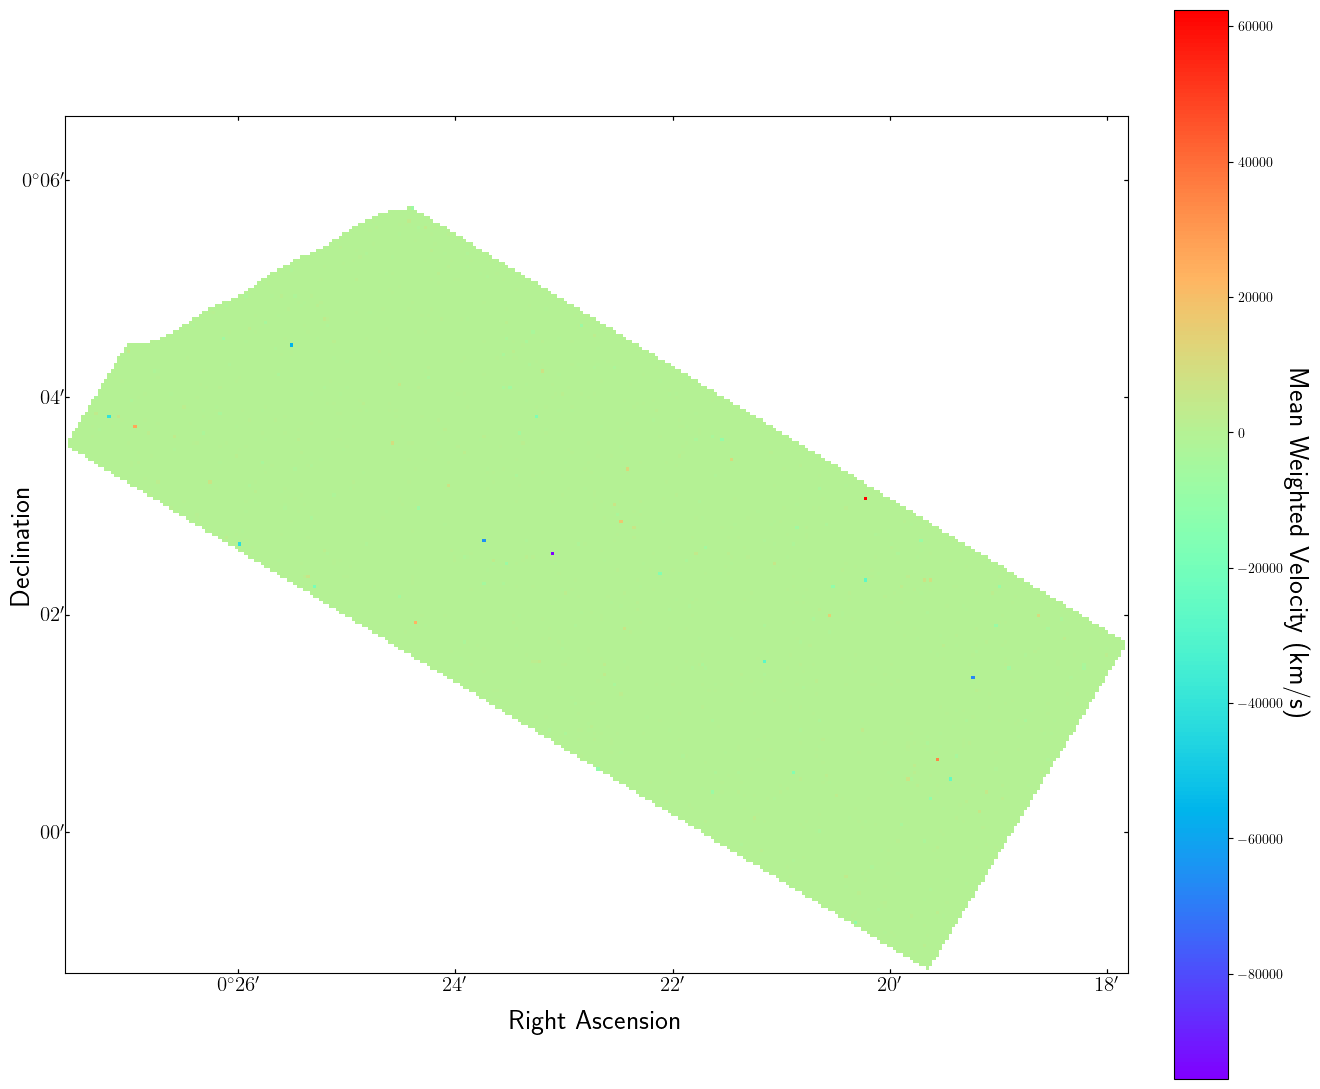

In [8]:

import numpy as np                          # I use this for maths and sometimes arrays.
import pylab                                # I use this for arrays and plotting
import matplotlib                           # Another plotting package
import matplotlib.gridspec as gridspec      # If there is a task you use a lot, importing it like this 
import scipy
import astropy.io.fits as fits              # I use this to import FITS images. 
from astropy.wcs import WCS                 # This one helps us add coordinates to images
from astropy import units as u              # This one helps with unit conversion
import regions
import pyspeckit as psk                     # I use this to do spectral line fitting
from spectral_cube import SpectralCube      # This is a handy package for working with 3D data cubes
import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
%matplotlib inline                             
matplotlib.rc('font', family='sans-serif')  # Set plot fonts
matplotlib.rc('text', usetex=True)      
#matplotlib.rc('text', usetex=False)        # This is a quick fix if you don't have latex on your computer
fig1 = pylab.figure(1,figsize=(15,15))
sc = SpectralCube.read("cloudc_SiO21_cutout_downsampled9.fits")
sc_kms = sc.with_spectral_unit(u.km/u.s,velocity_convention="radio") # change from frequency to velocity
sc_slab = sc_kms.spectral_slab(-75. *u.km / u.s, -25. *u.km / u.s)  # Extract a subset of the velocities
sc_slab.allow_huge_operations=True
sc_bin = sc_slab.downsample_axis(3,axis=0)
print(sc)
sc_K_kms = sc_bin                 # Change intensity unit from Jy/beam to K
moment_1  = sc_K_kms.moment(order=1,how='slice') 
print(sc_K_kms)
ax1 = pylab.subplot(projection=moment_1.wcs) 
im1 = pylab.imshow(moment_1.hdu.data,cmap='rainbow')
RA = ax1.coords[0]                                                                  
Dec = ax1.coords[1]
RA.set_ticks(size=-3)                                                                                      
Dec.set_ticks(size=-3)                                                                                    
pylab.xlabel('Right Ascension',fontsize=20,labelpad=1)                               
pylab.ylabel('Declination',fontsize=20,labelpad=0)
ax1.tick_params(axis = 'both', which = 'major', labelsize = 15)    
cb=pylab.colorbar(im1,fraction=0.046,pad=0.04)                                      
cb.set_label(label='Mean Weighted Velocity (km/s)',fontsize=20,rotation=270,labelpad=20) 
cb.ax.tick_params(which = 'major', labelsize = 10)   
#pylab.annotate(s='Moment 1',fontsize=35,xy=(0.02,0.91),xycoords="axes fraction")